# Titanic Machine Learning from Disaster

### Import the necessary libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset

In [38]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Shape of the dataset

In [39]:
df.shape

(891, 12)

### Data types of all columns

In [40]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


### Describe the dataset

In [41]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Values

In [42]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


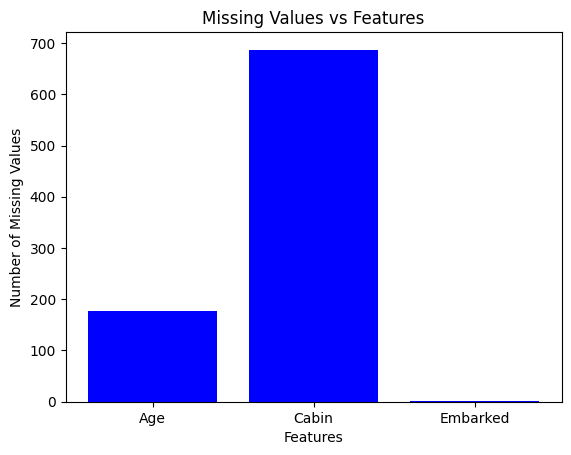

In [43]:
## Visualization
categories = ['Age','Cabin','Embarked']
missing_values = [177,687,2]
plt.bar(categories,missing_values,color='blue')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values vs Features')
plt.show()

### Drop unnecessary values


In [44]:
df = df.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis = "columns")

### Visualizations

### Survival Rate vs Gender

In [45]:
survival_chances= df.groupby('Sex')['Survived'].mean()
print("Survival rate by sex is :\n")
print(survival_chances)

Survival rate by sex is :

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


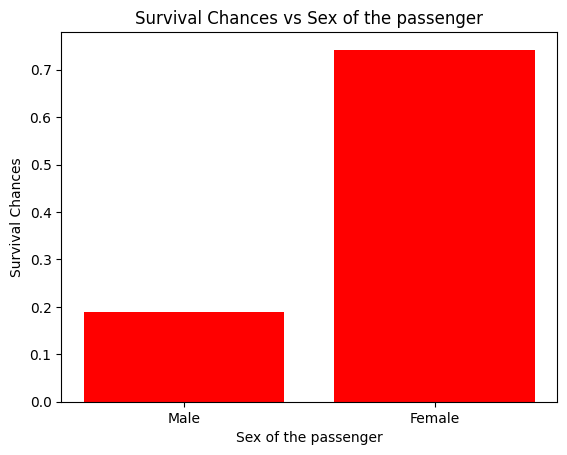

In [46]:
plt.bar(['Male','Female'],[0.188908,0.742038],color='red')
plt.xlabel('Sex of the passenger')
plt.ylabel('Survival Chances')
plt.title('Survival Chances vs Sex of the passenger')
plt.show()

In [47]:
## Survival chances with respect to socio economic status
survived_rate = df.groupby('Pclass')['Survived'].mean()
print('Survival Rate of people according to socio economic status')
print(survived_rate)

Survival Rate of people according to socio economic status
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


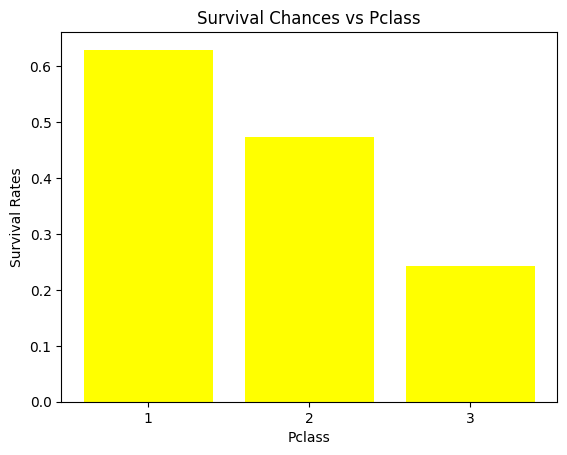

In [48]:
plt.bar(['1','2','3'],[0.629630,0.472826,0.242363],color='yellow')
plt.xlabel('Pclass')
plt.ylabel('Survival Rates')
plt.title('Survival Chances vs Pclass')
plt.show()

### Create matrix of features and dependent variable vector

In [49]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [50]:
print(X)

[[3 'male' 22.0 1 0 7.25]
 [1 'female' 38.0 1 0 71.2833]
 [3 'female' 26.0 0 0 7.925]
 ...
 [3 'female' nan 1 2 23.45]
 [1 'male' 26.0 0 0 30.0]
 [3 'male' 32.0 0 0 7.75]]


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

In [52]:
print(X)

[[3 1 22.0 1 0 7.25]
 [1 0 38.0 1 0 71.2833]
 [3 0 26.0 0 0 7.925]
 ...
 [3 0 nan 1 2 23.45]
 [1 1 26.0 0 0 30.0]
 [3 1 32.0 0 0 7.75]]


In [53]:
print(X[0])

[3 1 22.0 1 0 7.25]


In [54]:
X = np.array(X)

### Fill missing Values

In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
imputer.fit(X[:,2:])
X[:,2:] = imputer.transform(X[:,2:])

### Train your model

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier.fit(X,y)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [57]:
dataset = pd.read_csv('test.csv')

In [58]:
dataset = dataset.drop(['Name','PassengerId','Embarked','Ticket','Cabin'],axis = 'columns')

In [59]:
dataset

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:,1] = le.fit_transform((dataset.iloc[:,1]))

In [61]:
dataset

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,NaN,0,0,8.0500


In [62]:
dataset = np.array(dataset)

In [63]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean',missing_values = np.nan)
imputer.fit(dataset[:,2:])
dataset[:,2:]=imputer.transform(dataset[:,2:])

### Test on result

In [64]:
y_pred = classifier.predict(dataset)

In [65]:
dataset[0]

array([3, 1, 34.5, 0.0, 0.0, 7.8292], dtype=object)

In [66]:
dataset = pd.read_csv('test.csv')

In [67]:
dataset = np.array(dataset)
print(dataset[0])

[892 3 'Kelly, Mr. James' 'male' 34.5 0 0 '330911' 7.8292 nan 'Q']


In [68]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
data = np.concatenate((dataset[:,0].reshape(len(dataset[:,0]),1),y_pred.reshape(len(y_pred),1)),1)

In [70]:
import csv
with open('titanic_result.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)
